# Recurrent Neural Network template

## ======= import the training set =======

In [1]:
import pandas as pd
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

## ======= Feature Scaling ========

In [2]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)                                

## ======== Creating a data structure with 60 timesteps and 1 output ======

In [3]:
import numpy as np
x_train = []
y_train = []
num_base = 20 #the number of previous data used to predict the current data
for i in range(num_base, training_set_scaled.shape[0]):
    x_train.append(training_set_scaled[i-num_base:i, 0])
    y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))

## ======== Construct the RNN ==========

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

def build_regressor(_optimizer):
    #Initialise
    regressor = Sequential()
    
    #1st LSTM layer and some dropout regularization
    regressor.add(LSTM(units=50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
    regressor.add(Dropout(0.2))
    
    #intermediate LSTM layers and dropout regularization
    for i in range(0):
        regressor.add(LSTM(units=50, return_sequences=True))
        regressor.add(Dropout(0.2))

    #last LSTM layer and dropout regularization
    regressor.add(LSTM(units=50))
    regressor.add(Dropout(0.2))
    
    #output layer
    regressor.add(Dense(units=1))
    
    #compile
    regressor.compile(optimizer=_optimizer, loss = 'mean_squared_error')
    
    return regressor

regressor = build_regressor('rmsprop')

for layer in regressor.layers:
    print (layer.name, layer.input_shape, '-->', layer.output_shape)
print (regressor.summary())

Using TensorFlow backend.


lstm_1 (None, 20, 1) --> (None, 20, 50)
dropout_1 (None, 20, 50) --> (None, 20, 50)
lstm_2 (None, 20, 50) --> (None, 50)
dropout_2 (None, 50) --> (None, 50)
dense_1 (None, 50) --> (None, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
______________

## ========= imort the test data =========

In [5]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

dataset_total = np.append(training_set[-num_base:, 0:], real_stock_price, axis=0)
dataset_total = sc.transform(dataset_total)

x_test = []
y_test = []
for i in range(num_base, dataset_total.shape[0]):
    x_test.append(dataset_total[i-num_base:i, 0])
    y_test.append(dataset_total[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)

x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

## ====== Fit the RNN =========

In [6]:
history = regressor.fit(x_train, y_train, epochs=100, batch_size=20, verbose=0, validation_data = (x_test, y_test))

## ====== predict =======

In [7]:
y_pred = regressor.predict(x_test)
y_pred = sc.inverse_transform(y_pred)

## ======= Visualise ===========

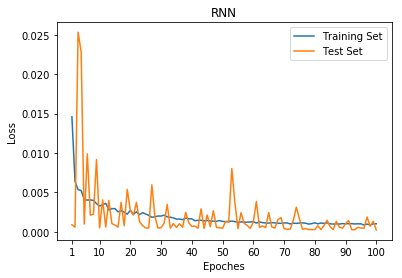

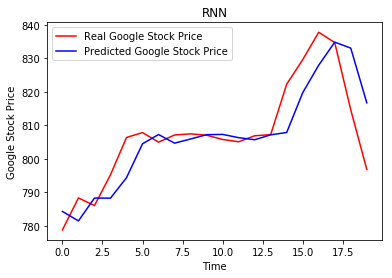

In [8]:
import matplotlib.pyplot as plt
#loss
num_epoches = len(history.history['loss'])
plt.plot (history.history['loss'], label = 'Training Set')
plt.plot (history.history['val_loss'], label = 'Test Set')
plt.xticks([0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99], labels = ['1', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100'])
plt.title('RNN')
plt.ylabel('Loss')
plt.xlabel('Epoches')
plt.legend()
plt.show()
#predict
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('RNN')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()